# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
#QUESTION 1

#part 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colcomp_df = pd.read_csv('/college_completion.csv')

colcomp_df.head(5)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
#part 2

dimensions = colcomp_df.shape
print(dimensions)
#there are 3798 rows and 63 columns

num_observations = dimensions[0]
print(num_observations)
#there is a total of 3798 observations in the csv

variables = colcomp_df.columns.tolist()
print(variables)
#the variables are listed in the output below

(3798, 63)
3798
['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after

In [ ]:
#part 3

cross_tab = pd.crosstab(colcomp_df['control'], colcomp_df['level'])
print(cross_tab)

#the majority of institutions are 4-year private not-for-profit universities, while there are less 2 year private non-for-profits
#the second highest number of institutions are 2-year public institutions, and 4-year public universities following the 2-year ones
#private for-profit universities share a similar number to the public 4-year institutions, with about 100-150 schools less
#private not-for-profit schools have the lowest number of universities
#the majority of institutions are 4-year, and most are public

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


<Axes: xlabel='grad_100_value', ylabel='Count'>

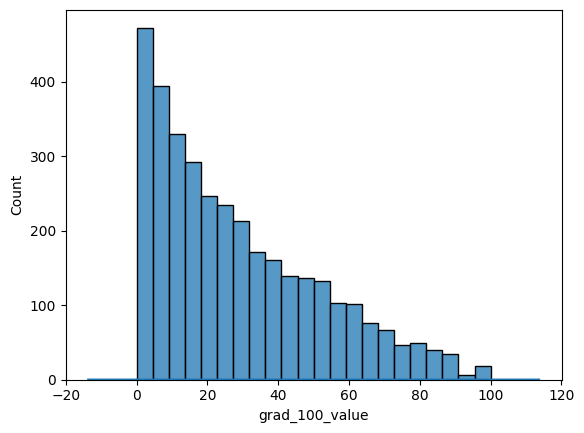

In [ ]:
#part 4

#histogram
sns.histplot(colcomp_df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

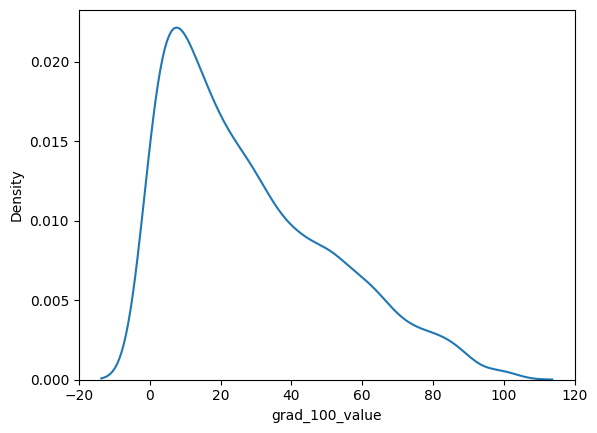

In [ ]:
#kernel density plot
sns.kdeplot(colcomp_df['grad_100_value'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='grad_100_value'>

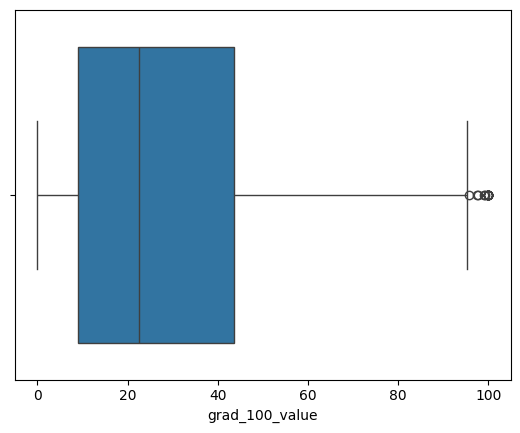

In [ ]:
#box plot
sns.boxplot(x=colcomp_df['grad_100_value'])

In [ ]:
#statistical description
colcomp_df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

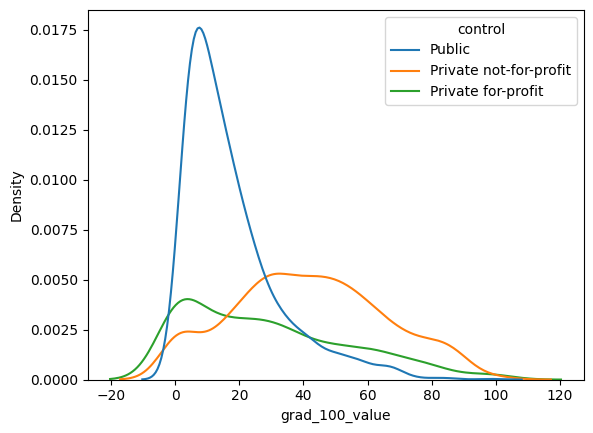

In [ ]:
#part 5

#grouped by control
sns.kdeplot(data = colcomp_df, x= 'grad_100_value', hue = 'control')

#pubic universities appear to have the lowest value

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

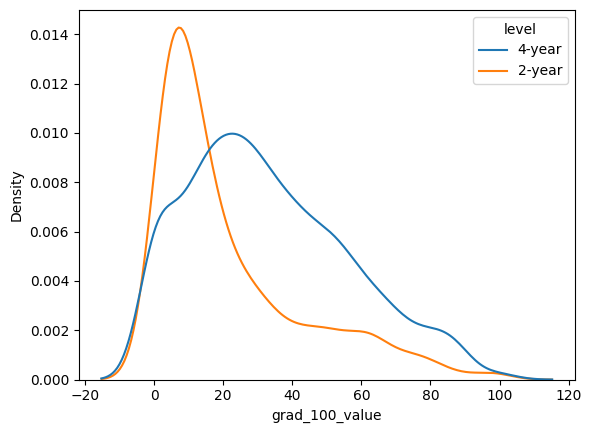

In [ ]:
#grouped by level
sns.kdeplot(data = colcomp_df, x= 'grad_100_value', hue = 'level')

#2-year universities have a lower average value than the 4-year universities

In [ ]:
#statistical description
grouped_stats = colcomp_df.groupby(['control', 'level'])['grad_100_value'].describe()
print(grouped_stats)

#on average, private 4-year and 2-year not-for-profit schools have higher graduation rates compared to the other conditions, at 42%
#2-year private for-profit schools are a close second, and public 2-year universities have the lowest rate at 12%

                                count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                    

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

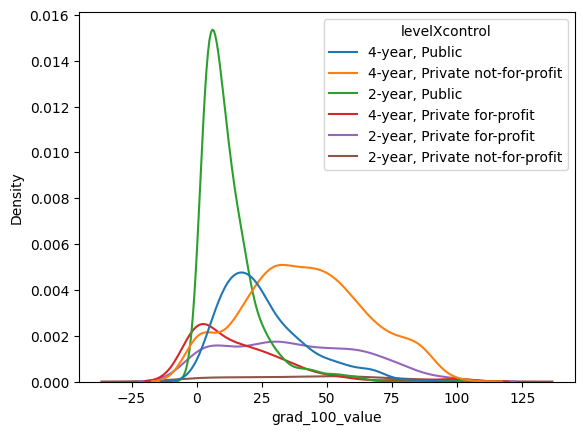

In [ ]:
#part 6

colcomp_df['levelXcontrol']= colcomp_df['level']+', '+ colcomp_df['control']
sns.kdeplot(data= colcomp_df,x='grad_100_value',hue='levelXcontrol')

colcomp_df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

#overall, both 2-year and 4-year private not for profit schools have the best average graduation rate, with little difference between 2 and 4 year institutions in the control
#2-year private for profit schools have higher rates (almost double) to 4-year private for profit ones
#both 4-year and 2-year public schools appear to have the worst rates, although 4-year public is almost 10 points higher than 4-year private for-profit institutions

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

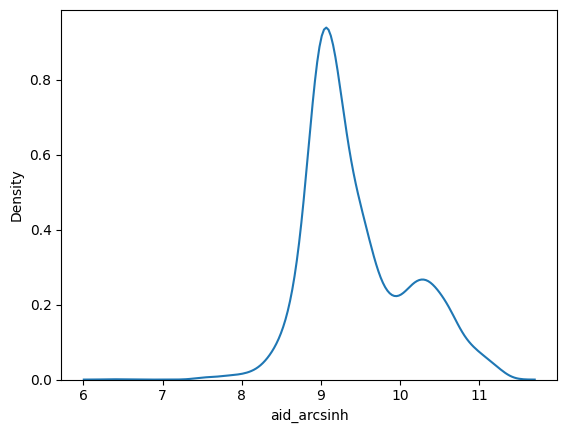

In [ ]:
#part 7

colcomp_df['aid_arcsinh'] = np.arcsinh(colcomp_df['aid_value'])
sns.kdeplot(data= colcomp_df,x='aid_arcsinh')

#the smaller hump represents the private not-for-profit universities, whereas the taller one illustrates public and private for-profit ones

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

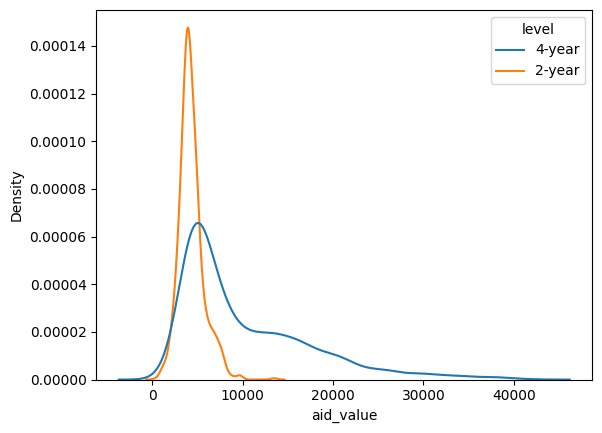

In [ ]:
#grouped by 'level'
sns.kdeplot(data=colcomp_df, x='aid_value', hue='level')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

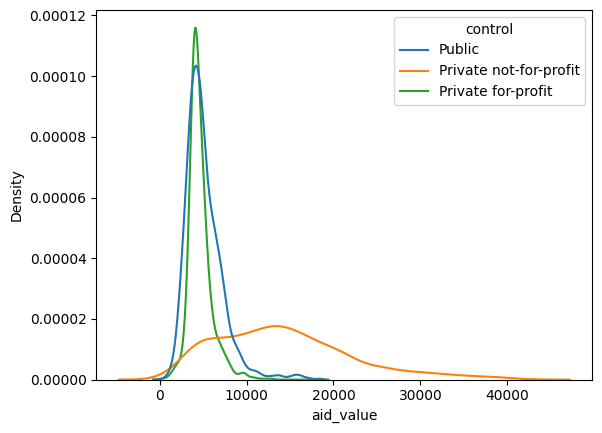

In [ ]:
#grouped by 'control'
sns.kdeplot(data=colcomp_df, x='aid_value', hue='control')

In [ ]:
colcomp_df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [ ]:
colcomp_df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [ ]:
#the wideness of the private not-for-profit distribution illustrates the fact that those institutions tend to give more aid than the other ones

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

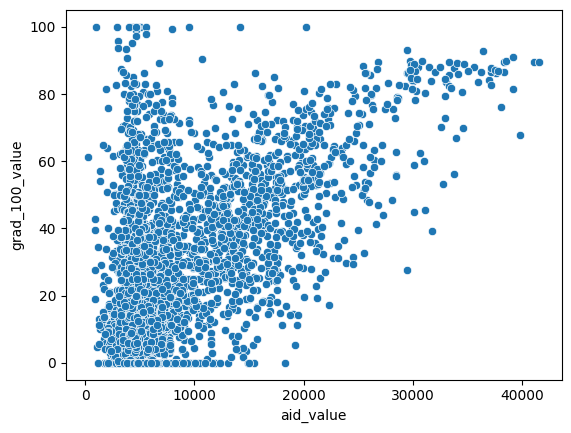

In [ ]:
#part 8

sns.scatterplot(data=colcomp_df,x='aid_value',y='grad_100_value')

#this scatterplots represents a positive association between the two variables
#the grad_100_value variable appears to extend more on the y axis, while the aid_value tapers off more

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

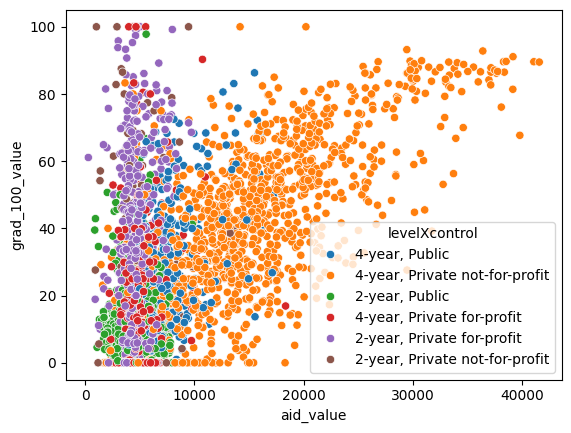

In [ ]:
#grouped by level and control
sns.scatterplot(data=colcomp_df,x='aid_value',y='grad_100_value',hue='levelXcontrol')

#aid has the largest impact on the graduation rates of the 4-year private not-for-profit institutions
#as aid increases, so does the graduation rates for those schools
#the 4-year public schools slightly follow this trend, but not to the same extent
#the graduation rates of the other institution types are less dependent on aid provided

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [105]:
#QUESTION 4

#part 1

covidnurse_df = pd.read_csv('/COVID-19 Nursing Home Data 09.15.2024.csv')

covidnurse_df.head(5)

<ipython-input-105-4f900bc413c9>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  covidnurse_df = pd.read_csv('/COVID-19 Nursing Home Data 09.15.2024.csv')


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,"Total Resident COVID-19 Deaths Per 1,000 Residents","Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*part 2*

The data dictionary does not provide adequate information on how missing variables are handled nor does it describe possible values and missing value codes. This is true for both categorical and numeric variables. There is one variable, the "Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines" column which explains that blank pieces of data are filled in with the value from the previous week. The dictionary provides the column name, the description of the column, and the type of variable (Date, Text, Number). This data dictionary would benefit from including more information on the handeling of missing variables.

In [76]:
#part 3

#the chosen variables for cleaning are "Provider State", "Submitted Data", "Residents Total All Deaths", and "Number of All Beds"

#Numeric 1
covidnurse_df['Residents Total All Deaths'] = pd.to_numeric(covidnurse_df['Residents Total All Deaths'], errors='coerce')
covidnurse_df['totaldeaths_nan'] = covidnurse_df['Residents Total All Deaths'].isnull()

impute_value = covidnurse_df['Residents Total All Deaths'].mean
covidnurse_df['totaldeaths_impute'] = covidnurse_df['Residents Total All Deaths'].fillna(impute_value)

In [77]:
#Numeric 2
covidnurse_df['Number of All Beds'] = pd.to_numeric(covidnurse_df['Number of All Beds'], errors='coerce')
covidnurse_df['numberbeds_nan'] = covidnurse_df['Number of All Beds'].isnull()

impute_value = covidnurse_df['Number of All Beds'].mean
covidnurse_df['numberbeds_impute'] = covidnurse_df['Number of All Beds'].fillna(impute_value)

In [78]:
#Categorical 1
print(covidnurse_df['Provider State'].unique(), '\n')
covidnurse_df['Provider State'] = covidnurse_df['Provider State'].replace(' ',np.nan)

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'GU'] 



In [79]:
#Categorical 2
print(covidnurse_df['Submitted Data'].unique(), '\n')
covidnurse_df['Submitted Data'] = covidnurse_df['Submitted Data'].replace(' ',np.nan)

['Y' 'N'] 



In [81]:
#save to new df
cleaned_covidnurse = covidnurse_df

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Residents Total All Deaths'>

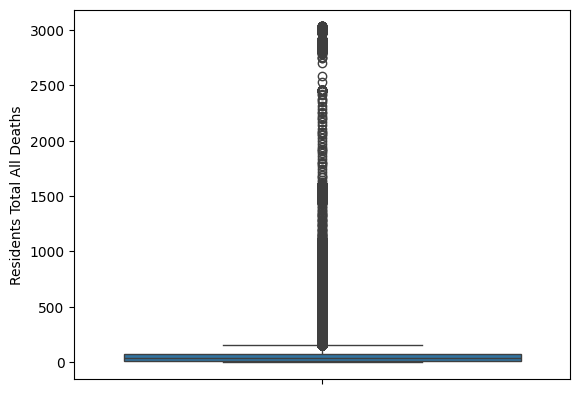

In [82]:
#part 4

#Numeric 1 boxplot
sns.boxplot(cleaned_covidnurse['Residents Total All Deaths'])

#there is a significant number of outliers above the ~200 line for Residents Total All Deaths

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Number of All Beds'>

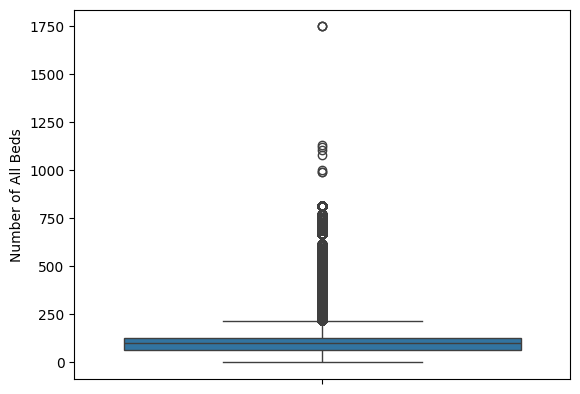

In [84]:
#Numeric 2 boxplot
sns.boxplot(cleaned_covidnurse['Number of All Beds'])

#there is a large number of outliers between ~250 and ~750, then tapers off, then an additional outlier is seen at 1750

Provider State
TX    271397
CA    265509
OH    213410
FL    157964
IL    157598
PA    153530
NY    137722
IN    118183
MO    115517
MI     97220
NC     95745
IA     95200
MA     80924
GA     80831
MN     80316
NJ     79576
WI     76592
KS     71269
TN     70188
OK     66431
VA     65058
KY     62692
LA     61168
AL     51057
MD     50709
AR     49950
CO     49398
CT     46214
MS     45915
WA     44781
NE     42837
SC     42602
AZ     32298
OR     29181
WV     27761
SD     22726
UT     22099
ME     19900
ID     18209
ND     17495
RI     17162
NH     16591
NM     15479
NV     15047
MT     14810
DE     10109
HI      9591
WY      8065
VT      7828
AK      4519
DC      3917
PR      1381
GU       226
Name: count, dtype: int64


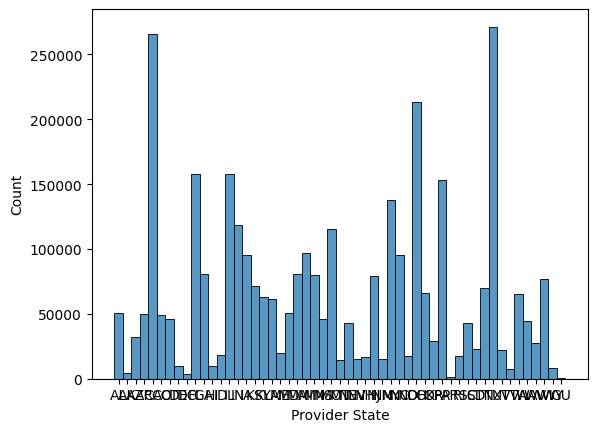

In [89]:
#Categorical #1
sns.histplot(data=cleaned_covidnurse,x= 'Provider State')
state_counts = cleaned_covidnurse['Provider State'].value_counts()
print(state_counts)

#TX,CA, and OH are outliers given their large total. Guam is an outlier given its very small total compared to the other totals, with only 226 providers in the teritory

Submitted Data
Y    3380282
N      31615
Name: count, dtype: int64


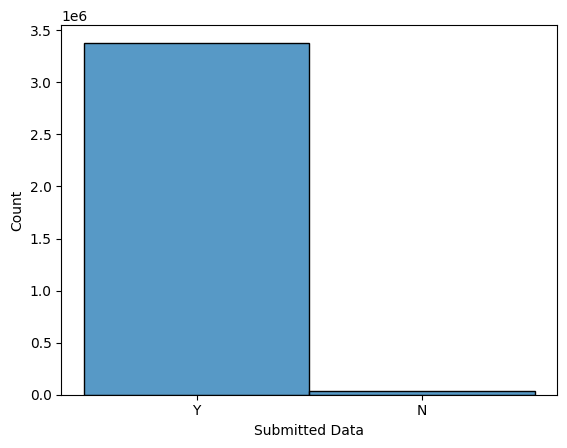

In [90]:
#Categorical #2
sns.histplot(data=cleaned_covidnurse,x= 'Submitted Data')
Y_N_counts = cleaned_covidnurse['Submitted Data'].value_counts()
print(Y_N_counts)

#any "No" responses could be considered outliers because there are so few of them compared to the "Yes" responses

<Axes: xlabel='Number of All Beds', ylabel='Density'>

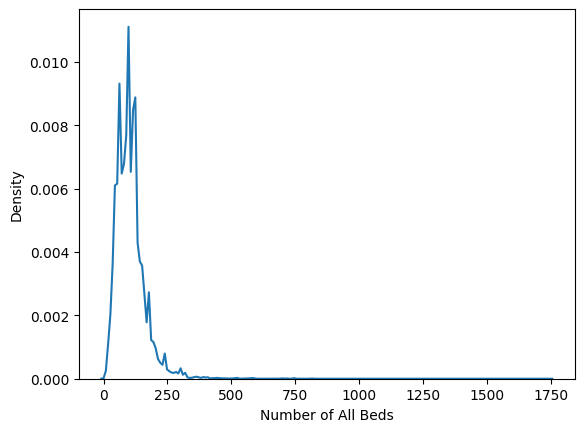

In [93]:
#part 5

sns.kdeplot(data=cleaned_covidnurse, x = 'Number of All Beds')

#kernel density plot pre scaling
#this plot needs to be scaled because the graph is very skewed, and it is difficult to discern the mode

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='numberbeds_log', ylabel='Density'>

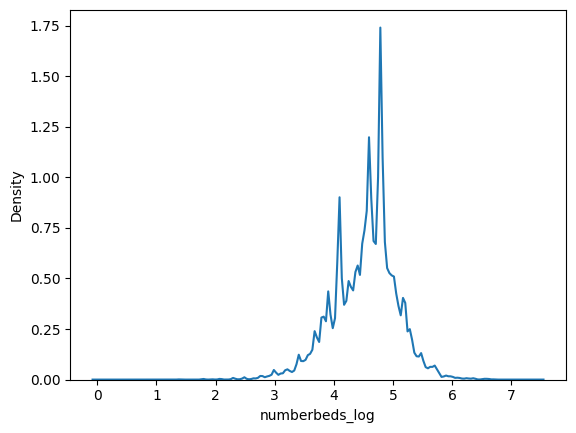

In [94]:
cleaned_covidnurse['numberbeds_log'] = np.log(cleaned_covidnurse['Number of All Beds'])

sns.kdeplot(data=cleaned_covidnurse, x = 'numberbeds_log')

#kernel density plot post scaling

<Axes: xlabel='Residents Total All Deaths', ylabel='Number of All Beds'>

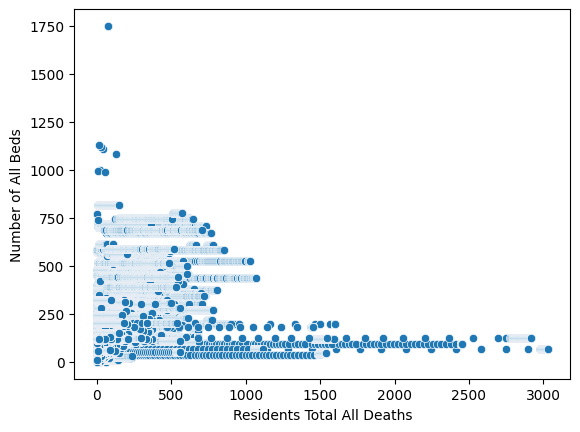

In [98]:
#part 6

sns.scatterplot(data=cleaned_covidnurse,x='Residents Total All Deaths',y='Number of All Beds')

#this graph illustrates a somewhat negative correlation between "Residfents Total All Deaths" and "Number of All Beds"
#this suggests that there are less beds in the facility when there is a higher total death value
#it also represents that less deaths somewhat correlte to more beds, with the outlier at 1750 displaying the highest number of beds at the lowest death total

In [104]:
#part 7

pd.options.display.float_format = '{:.2f}'.format
cleaned_covidnurse['Residents Total All Deaths'].describe()

#the mean among the total of all deaths is 53.14, the total each week increases based on the the number of deaths occurred
#if no deaths occurred in a given week, the number from the previous week would carry over
#the minimum number of total deaths is 0 and the maximum is $3,030
#The number of deaths varies widely, with a standard deviation of 68.89
#half of the records show 37 or fewer deaths, while a small number of records have very high death counts (as seen by the max of 3,030)
#the distribution is likely skewed due to this large gap between the mean (53.14) and the maximum value (3030)

,Residents Total All Deaths
count,3361675.00
mean,53.14
std,68.89
min,0.00
25%,16.00
50%,37.00
75%,71.00
max,3030.00
